<Center><h1>Computational reproduction, optimisation and discussion of the ATLAS Experiment analysis on the production of ZZ in proton-proton collisions at √s = 13 TeV using Open Data</h1></Center>

### Comparación entre los metodos estadisticos least-square y likelihood implementado en ROOT, para histogramas de estadística baja.

Para evaluar la robustes de ambos metodos, se realizo una serie de procedimientos:
* Se genero una realización aleatoria con N=100 eventos (“toy sample”) a partir de una PDF landau, con MPV = 200 y σ = 20.
* Se hizo un Fit.
* Se observo los parametros fiteados, uno de esos parametros por ejemplo es el MPV que es el valor mas probable.

**Necesitamos incluir algunas bibliotecas estándar de C++ y ROOT**

In [1]:
#include <TFile.h>
#include <TH1.h>
#include <TLine.h>
#include <TPoint.h>
#include <string>
#include <TMath.h>
#include <stdio.h>
#include <stdlib.h>
#include <cstdio>
#include <iostream>
#include <time.h> 
#include <math.h>

In [2]:
  TCanvas * c1 = new TCanvas("c1" , "c1" , 900 , 600 ) ; 
  int nEvents = 96 // no lo puedo hacer con mis datos porque solo funciona una vez 

(int) 96


In [3]:
  TF1 * func = new TF1("func" , "[0]*TMath::Landau(x,[1],[2])",100,500) ; //
  func->SetParameters(nEvents,200,20) ; //pido que el valor mas probable este en 200 y con desviación estandar= 20
  func->SetParNames("N","MPV","Sigma") ;

  TH1D * histo = new TH1D("histo" , "histo" , 20 , 120 , 500 ) ;  
  histo->SetLineColor(2) ; 
  histo->SetMarkerColor(1) ;

  histo->FillRandom("func" , nEvents) ;  

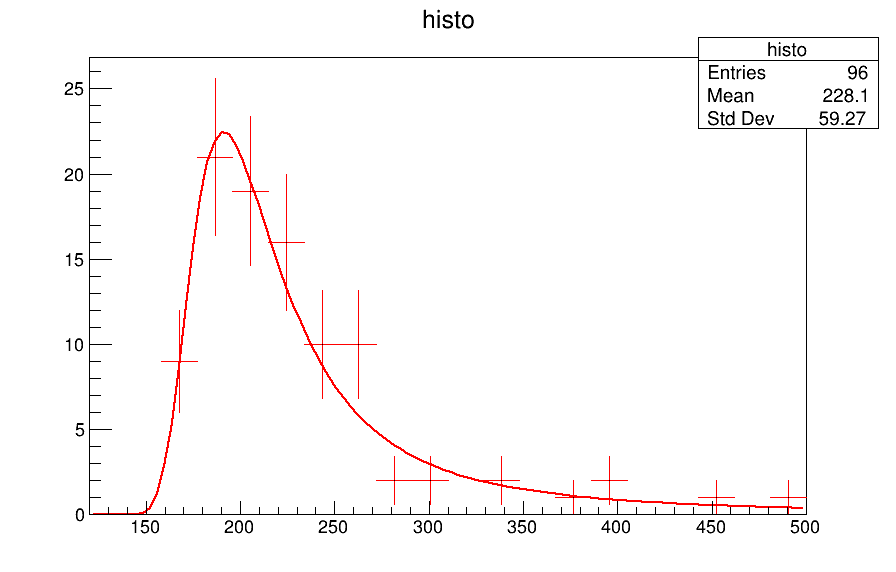

 FCN=6.21603 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=7.42056e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.24284e+02   1.95223e+01   1.72112e-02  -8.40242e-06
   2  MPV          1.94697e+02   3.50375e+00   3.87591e-03  -7.04369e-06
   3  Sigma        1.54393e+01   2.11036e+00   1.69948e-03  -7.33787e-05


In [4]:
  histo->Fit("func" , "" , "" , 120 , 500 ) ; 
  histo->Draw("e") ;  
  c1->Draw();

N realizaciones aleatorias

In [5]:
  TH1D * Mean_square_least = new TH1D("Mean_square-least" , "Mean_square-least" , 205,120,500) ; 
  int valor = 0 ; 

//100 realizaciones
  for( int index = 0 ; index < 100 ; ++index){
      //cout<<index<<endl;
      
    //Se generan numeros de eventos aleatorios que sigan una distribución poissoniana    
    valor = gRandom->Poisson(nEvents);
    func->SetParameters(nEvents,200,20);
      
    //reseteo mi histograma
    histo->Reset(); 
      
    //Usamos FillRandom para llenar aleatoriamente el histograma usando el contenido de la función TF1 que es landau en este caso
    //Se creo y se lleno un histograma (valor) veces con una distribución landau con MPV 200 y sigma 20:
      histo->FillRandom("func" , valor);
      
    //histo->Draw("same"); 
    //Ajustamos el histograma con la misma función predefinida, en este caso es la distribucion de landau, usando: 
    histo->Fit("func" , "" , "" , 120 , 500 );
      
    //cout << func->GetParameter(1) << " +/- " << func->GetParError(1) << endl; 
   //mean->Fill( (func->GetParameter(1)-200) /func->GetParError(1) ); 
      
      //Se lleno un histograma con los valores del parametro 1(MPV) de la función ajustada landau, para ver
      //si el valor central es el valor real. 
   Mean_square_least->Fill(func->GetParameter(1)); 
    
 }
  
  Mean_square_least->Draw() ; 

 FCN=13.1998 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=1.09633e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.18419e+02   2.28055e+01   2.22647e-02  -6.28343e-06
   2  MPV          1.96677e+02   3.57912e+00   6.03720e-03   7.89149e-05
   3  Sigma        1.68900e+01   3.09185e+00   2.93044e-03   4.83211e-05
 FCN=22.9303 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=1.18912e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            9.61984e+01   1.74201e+01   2.59840e-02  -1.53867e-05
   2  MPV          1.96253e+02   4.00986e+00   9.14523e-03   7.01671e-05
   3  Sigma        1.67087e+01   

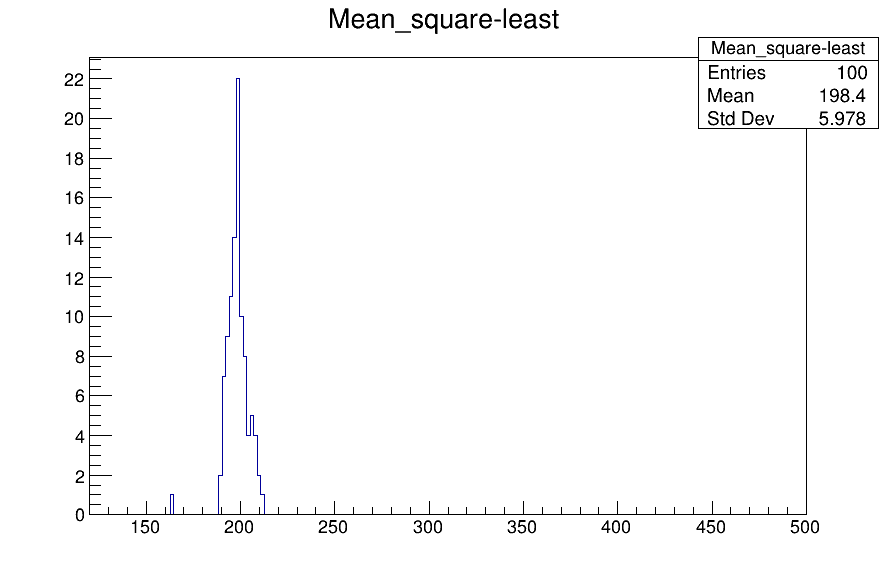

In [6]:
c1->Draw()

In [7]:
  TH1D * Mean_likelihood = new TH1D("Mean_likelihood" , "Mean_likelihood" , 205,120,500) ; 
  int valor = 0 ; 

//100 realizaciones
  for( int index = 0 ; index < 100 ; ++index){
      // cout<<index<<endl;
    valor = gRandom->Poisson(nEvents) ;//
    func->SetParameters(nEvents,200,20) ; 
    histo->Reset(); //reseteo mi histograma
    histo->FillRandom("func" , valor);//lleno mi histograma aleatoriamente con valores  
    //histo->Draw("same"); 
    histo->Fit("func" , "QL" , "" , 120 , 500 );//Ajusto mi función con likelihood(minimiza la función de menos log-likelihood)
    //cout << func->GetParameter(1) << " +/- " << func->GetParError(1) << endl ; 
   // mean->Fill( (func->GetParameter(1)-200) /func->GetParError(1) ) ; 
   Mean_likelihood->Fill( func->GetParameter(1));//lleno mi histograma con el parametro 1 de la función ajustada
    
 }
  
  Mean_likelihood->Draw(); 

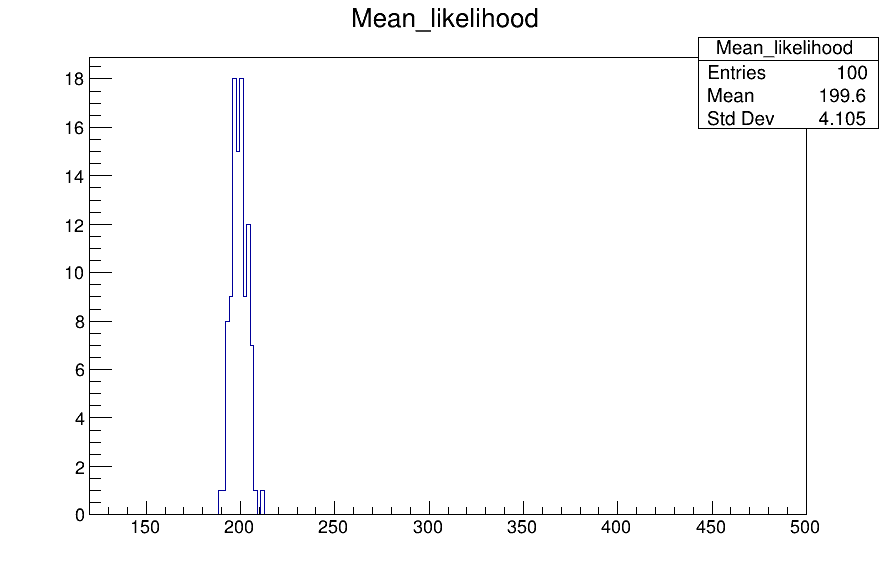

In [8]:
c1->Draw()

Se puede ver que el método de log-likelihood tiene la ventaja de tratar correctamente los contenedores con estadísticas bajas, ya que el least-square con poca estadística proporciona un resultado sesgado como se puede ver en el plot de Mean_square-least esto quiere decir que el valor central no es en el valor real de mi modelo, estadisticamente hablando la distribución esta desviada, ademas el RMS de least-square es notablemente mayor que el de log-Likelihood. En caso de estadísticas altas / bin, la distribución del contenido de bin se convierte en una distribución normal y ambos metodos como log-likelihood y least-square dan el mismo resultado. Normalmente, los recuentos de un histograma tienen una distribución de Poisson.

Además, cuando se usa el método square-least, existe el problema de los contenedores con cero entradas, en ROOT, estos contenedores se excluyen del ajuste, pero en realidad contienen información estadística valiosa. En cambio, se consideran en el método de log-likelihood.

El método log-likelihood, es el método recomendado en caso de estadísticas de bin bajas, donde el método least-square puede dar resultados incorrectos, en particular cuando hay varios bins vacíos.

Ver referencia: https://root.cern.ch/doc/master/classTH1.html#a63eb028df86bc86c8e20c989eb23fb2a
                https://pdg.lbl.gov/2004/reviews/statrpp.pdf
                https://root-forum.cern.ch/t/the-performance-of-th1-fit-using-chi-square-method/6175